<a href="https://colab.research.google.com/github/gee2450/NA_proj/blob/main/NAProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본 설정

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,190 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
# import numpy as np # 얘 뒤에도 있어서 일단 주석처리합니다. 
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='NanumGothic') 
plt.rc('axes', unicode_minus = False)

# dataset 생성
- 설문 조사 결과지를 2번에 거쳐 dataset 가공
  - csv 자료는 github에서 자동 다운로드   
  - code reference : https://dfso2222.tistory.com/48
  - 이전에 csv 받고 저장했으면, 생략하고 다음 소섹션으로 가면 됩니다.

In [ ]:
import requests # github에서 csv 가져오는 lib
import csv # 설문조사 결과 1차 가공 lib
import pandas as pd # csv 2차 가공 그리고 전처리

In [ ]:
url = 'https://raw.githubusercontent.com/gee2450/NA_proj/main/data/20210520_delivery.csv'
response = requests.get(url)

file_name = url.split('/')[-1]
file_url = '/content/'+file_name

if (response.status_code==200):
  result_csv = response.text 
else:
  print("Fail to get '" + file_name + "'. Please visit my github")
  print('https://github.com/gee2450/NA_proj')
  exit(0)

f = open(file_url, 'w', newline='')
f.write(result_csv)
f.close()


# padas로 dataset 생성 후 저장

# 설문조사 결과 csv
f = open(file_url, 'r', encoding="utf-8-sig")
result_csv = csv.reader(f)

# dataset 생성 파일
p = open('/content/deliver_dataset.csv', 'w', newline='')
write_csv = csv.writer(p)

cnt = 0
host_num = 0

situation = []
x = ['성별', '찜/탕', '돈까스/회/일식', '패스트푸드', '한식', '치킨', '족발/보쌈', '분식', '중식', '피자', '카페/디저트', '도시락', '아시안/양식', '상황', '음식']
for line in result_csv:
    if cnt==3:
        situation = line[16:]
    elif cnt==4:
        write_csv.writerow(x)

    if cnt<=4:
        cnt += 1
        continue

    for i in range(16, len(line)):
        x = []
        for k in range(3, 16):
          x.append(line[k])
        x.append(situation[host_num%6])
        x.append(line[i])
        write_csv.writerow(x)
        host_num += 1

f.close()
p.close()

  - 저장소에서 dataset 가져온다

In [ ]:
# 현재 csv 파일 encoding : cp949
data=pd.read_csv('/content/deliver_dataset.csv')
# Pycharm의 경우 아래 코드
# data=pd.read_csv('/content/deliver_dataset.csv', encoding="cp949")

In [ ]:
# 초기 dataset 확인용 code
print(data)
print(data.info())
# data 값에 NaN 없으니 그대로 진행

     성별  찜/탕  돈까스/회/일식  패스트푸드  ...  도시락  아시안/양식                    상황        음식
0    여성    7         5      6  ...   10       4  점심, 날씨 나쁠 때 먹고 싶은 음식       찜/탕
1    여성    7         5      6  ...   10       4  점심, 날씨 좋을 때 먹고 싶은 음식  돈까스/회/일식
2    여성    7         5      6  ...   10       4  저녁, 날씨 나쁠 때 먹고 싶은 음식     패스트푸드
3    여성    7         5      6  ...   10       4  저녁, 날씨 좋을 때 먹고 싶은 음식        한식
4    여성    7         5      6  ...   10       4  야식, 날씨 나쁠 때 먹고 싶은 음식        치킨
..   ..  ...       ...    ...  ...  ...     ...                   ...       ...
457  남성    1         6     12  ...    8       7  점심, 날씨 좋을 때 먹고 싶은 음식        한식
458  남성    1         6     12  ...    8       7  저녁, 날씨 나쁠 때 먹고 싶은 음식        한식
459  남성    1         6     12  ...    8       7  저녁, 날씨 좋을 때 먹고 싶은 음식        한식
460  남성    1         6     12  ...    8       7  야식, 날씨 나쁠 때 먹고 싶은 음식        한식
461  남성    1         6     12  ...    8       7  야식, 날씨 좋을 때 먹고 싶은 음식        한식

[462 rows x 15 columns]
<class 'pandas.

In [ ]:
# 각 내용 확인용 코드(run 필수x)

# -------1--------
# columns 확인용 code
print('-------1--------')
print(data.columns.tolist())

# -------2--------
# 성별 내용 확인용 code
print('-------2--------')
print(data['성별'].unique())

# -------3--------
# 음식 선호도는 너무 많아서 생략

# -------4--------
# 상황 내용 확인용 code
print('-------4--------')
print(data['상황'].unique())

# -------5--------
# 음식 내용 확인용 code
print('-------5--------')
print(data['음식'].unique())

-------1--------
['성별', '찜/탕', '돈까스/회/일식', '패스트푸드', '한식', '치킨', '족발/보쌈', '분식', '중식', '피자', '카페/디저트', '도시락', '아시안/양식', '상황', '음식']
-------2--------
['여성' '남성']
-------4--------
['점심, 날씨 나쁠 때 먹고 싶은 음식' '점심, 날씨 좋을 때 먹고 싶은 음식' '저녁, 날씨 나쁠 때 먹고 싶은 음식'
 '저녁, 날씨 좋을 때 먹고 싶은 음식' '야식, 날씨 나쁠 때 먹고 싶은 음식' '야식, 날씨 좋을 때 먹고 싶은 음식']
-------5--------
['찜/탕' '돈까스/회/일식' '패스트푸드' '한식' '치킨' '족발/보쌈' '분식' '중식' '피자' '카페/디저트' '도시락'
 '아시안/양식']


- 여기서부터 2차 데이터 가공

In [ ]:
# 성별 -> Gender, 남성 -> 0, 여성 -> 1
data['성별'] = data['성별'].replace(['남성'], 0)
data['성별'] = data['성별'].replace(['여성'], 1)
data = data.rename(columns={'성별': 'Gender'})

# 음식
# 한식 : 0, 분식 : 1, 카페/디저트 : 2, 돈까스/회/일식 : 3, 치킨 : 4,
# 피자 : 5, 아시안/양식 : 6, 중식 : 7, 족발/보쌈 : 8, 찜/탕 : 9,
# 도시락 : 10, 패스트푸드 : 11
data = data.rename(columns={'음식': 'Foods'})
food = [item for item in data['Foods'].unique()]
data['Foods'] = data['Foods'].replace(food, range(12))

# 날씨
# 날씨 나쁨 : 0, 날씨 좋음 : 1
data['Weather'] = data['상황']
data['Weather'] = data['Weather'].replace(
    ['점심, 날씨 나쁠 때 먹고 싶은 음식', '저녁, 날씨 나쁠 때 먹고 싶은 음식',
     '야식, 날씨 나쁠 때 먹고 싶은 음식'], 0)
data['Weather'] = data['Weather'].replace(
    ['점심, 날씨 좋을 때 먹고 싶은 음식', '저녁, 날씨 좋을 때 먹고 싶은 음식',
     '야식, 날씨 좋을 때 먹고 싶은 음식'], 1)

# 시간대
# 점심 : 0, 저녁 : 1, 야식 : 2
data['Time'] = data['상황']
data['Time'] = data['Time'].replace(
    ['점심, 날씨 나쁠 때 먹고 싶은 음식', '점심, 날씨 좋을 때 먹고 싶은 음식'], 0)
data['Time'] = data['Time'].replace(
    ['저녁, 날씨 나쁠 때 먹고 싶은 음식', '저녁, 날씨 좋을 때 먹고 싶은 음식'], 1)
data['Time'] = data['Time'].replace(
    ['야식, 날씨 나쁠 때 먹고 싶은 음식', '야식, 날씨 좋을 때 먹고 싶은 음식'], 2)

# 상황 column 삭제
data = data.drop('상황', axis=1)

# 음식 선호도 생략
origin_data = data

In [ ]:
print(food)
print(data['Foods'])

['찜/탕', '돈까스/회/일식', '패스트푸드', '한식', '치킨', '족발/보쌈', '분식', '중식', '피자', '카페/디저트', '도시락', '아시안/양식']
0      0
1      1
2      2
3      3
4      4
      ..
457    3
458    3
459    3
460    3
461    3
Name: Foods, Length: 462, dtype: int64


In [ ]:
# 최종 결과

print(data)

     Gender  찜/탕  돈까스/회/일식  패스트푸드  한식  ...  도시락  아시안/양식  Foods  Weather  Time
0         1    7         5      6   2  ...   10       4      0        0     0
1         1    7         5      6   2  ...   10       4      1        1     0
2         1    7         5      6   2  ...   10       4      2        0     1
3         1    7         5      6   2  ...   10       4      3        1     1
4         1    7         5      6   2  ...   10       4      4        0     2
..      ...  ...       ...    ...  ..  ...  ...     ...    ...      ...   ...
457       0    1         6     12   2  ...    8       7      3        1     0
458       0    1         6     12   2  ...    8       7      3        0     1
459       0    1         6     12   2  ...    8       7      3        1     1
460       0    1         6     12   2  ...    8       7      3        0     2
461       0    1         6     12   2  ...    8       7      3        1     2

[462 rows x 16 columns]


# dataset 시각화
- plot 함수들 정의
  - 그래프 그리는 데 필요한 모든 library 여기에 정리합니다.   
  - 원본 자리는 혹시몰라서 수정 X
  - Axes3D reference - https://wikidocs.net/14648

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns

In [ ]:
def make_plt(plt_name, x1, x2, xlabel, ylabel):
  plt.title(plt_name)
  plt.plot(epochs, x1)
  plt.plot(epochs, x2)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend(['train', 'val'], loc='upper left')

In [ ]:
def menu_3d(ax, column_x, column_y):
  plt.xlabel(column_x)
  plt.ylabel(column_y)

  xx = origin_data[column_x].unique()
  yy = origin_data[column_y].unique()
  x, y = np.meshgrid(xx, yy)
  x, y = x.ravel(), y.ravel()
  z = []

  ylst = [i for i in range(len(yy)+1)]
  plt.yticks(ylst)

  for y_ in yy:
    for x_ in xx:
      small_data = origin_data[origin_data[column_y]==y_]
      small_data = small_data[small_data[column_x]==x_]
      z.append(len(small_data))
  
  bottom = np.zeros_like(z)
  width = depth = 1

  colors = cm.rainbow( [0.2 + (1-0.2)/(len(x)-1)*i for i in range(len(x))] )

  ax.set_title(str(column_x)+" and "+str(column_y))
  ax.bar3d(x, y, bottom, width, depth, z, colors, shade=True)


In [ ]:
def menu_3d_data(ax, column_x, column_y, input_data):
  hosts = input_data[0]
  results = input_data[1]

  lst = data.columns.to_list()
  idx = lst.index(column_y)

  plt.xlabel(column_x)
  plt.ylabel(column_y)

  xx = origin_data[column_x].unique()
  yy = origin_data[column_y].unique()
  x, y = np.meshgrid(xx, yy)
  x, y = x.ravel(), y.ravel()

  ylst = [i for i in range(len(yy)+1)]
  x_size = len(origin_data[column_x].unique())
  y_size = len(origin_data[column_y].unique())

  z = [0]*(x_size*y_size)
  
  plt.yticks(ylst)

  for i in range(len(hosts)):
    y_ = hosts[i][idx]
    x_ = results[i]
    z[x_*y_size+y_] += 1
  
  bottom = np.zeros_like(z)
  width = depth = 1

  colors = cm.rainbow( [0.2 + (1-0.2)/(len(x)-1)*i for i in range(len(x))] )

  ax.set_title(str(column_x)+" and "+str(column_y))
  ax.bar3d(x, y, bottom, width, depth, z, colors, shade=True)

- 시각화 그래프

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


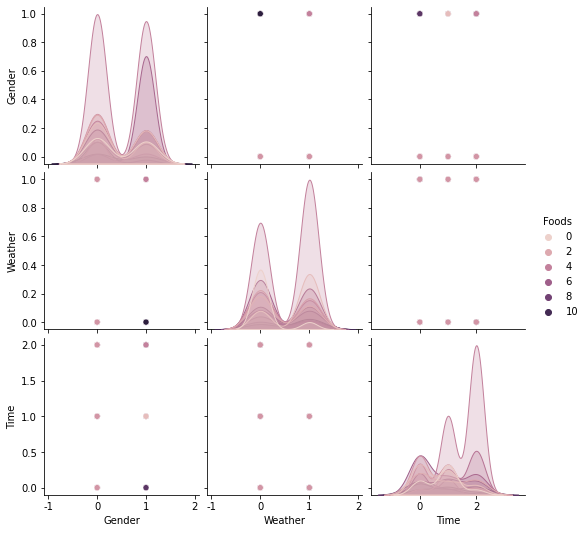

In [ ]:
import seaborn as sns
# sns.set(style="ticks", color_codes=True)
sns.pairplot(data[['Gender', 'Weather', 'Time', 'Foods']], hue ='Foods')
plt.show()

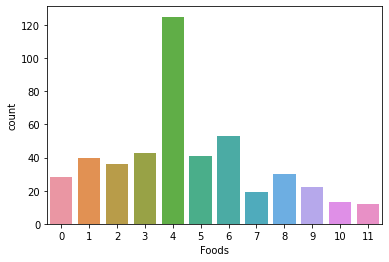

In [ ]:
# 4(치킨)번이 너무 압도적임 ,,
sns.countplot(x = 'Foods', data=data)
plt.show()

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


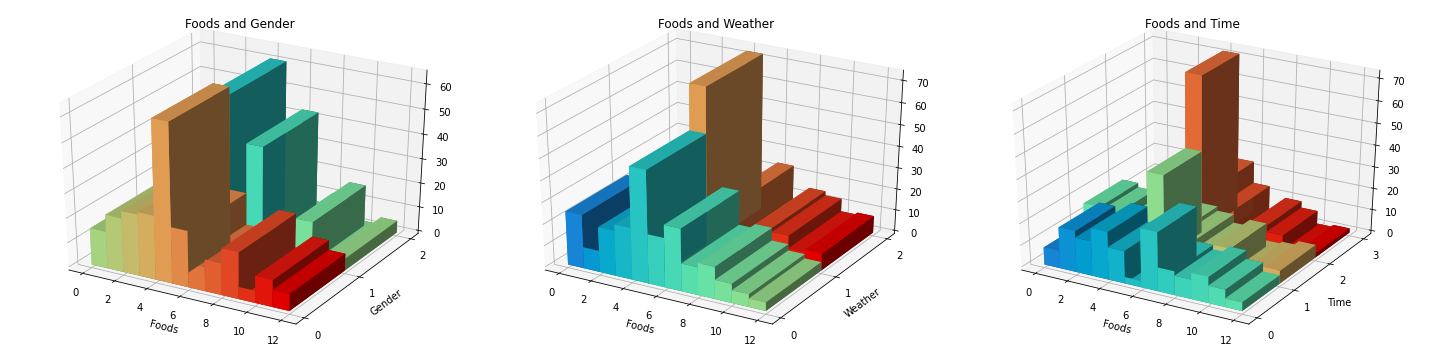

In [ ]:
# Food 와 Gender, Weather, Time 별 결과 분석

fig = plt.figure(figsize=(20, 5))

# Food 와 Gender
ax1 = fig.add_subplot(131, projection='3d')
menu_3d(ax1, 'Foods', 'Gender')

# Food 와 Weather
ax2 = fig.add_subplot(132, projection='3d')
menu_3d(ax2, 'Foods', 'Weather')

# Food 와 Time
ax3 = fig.add_subplot(133, projection='3d')
menu_3d(ax3, 'Foods', 'Time')

plt.tight_layout()
plt.show()

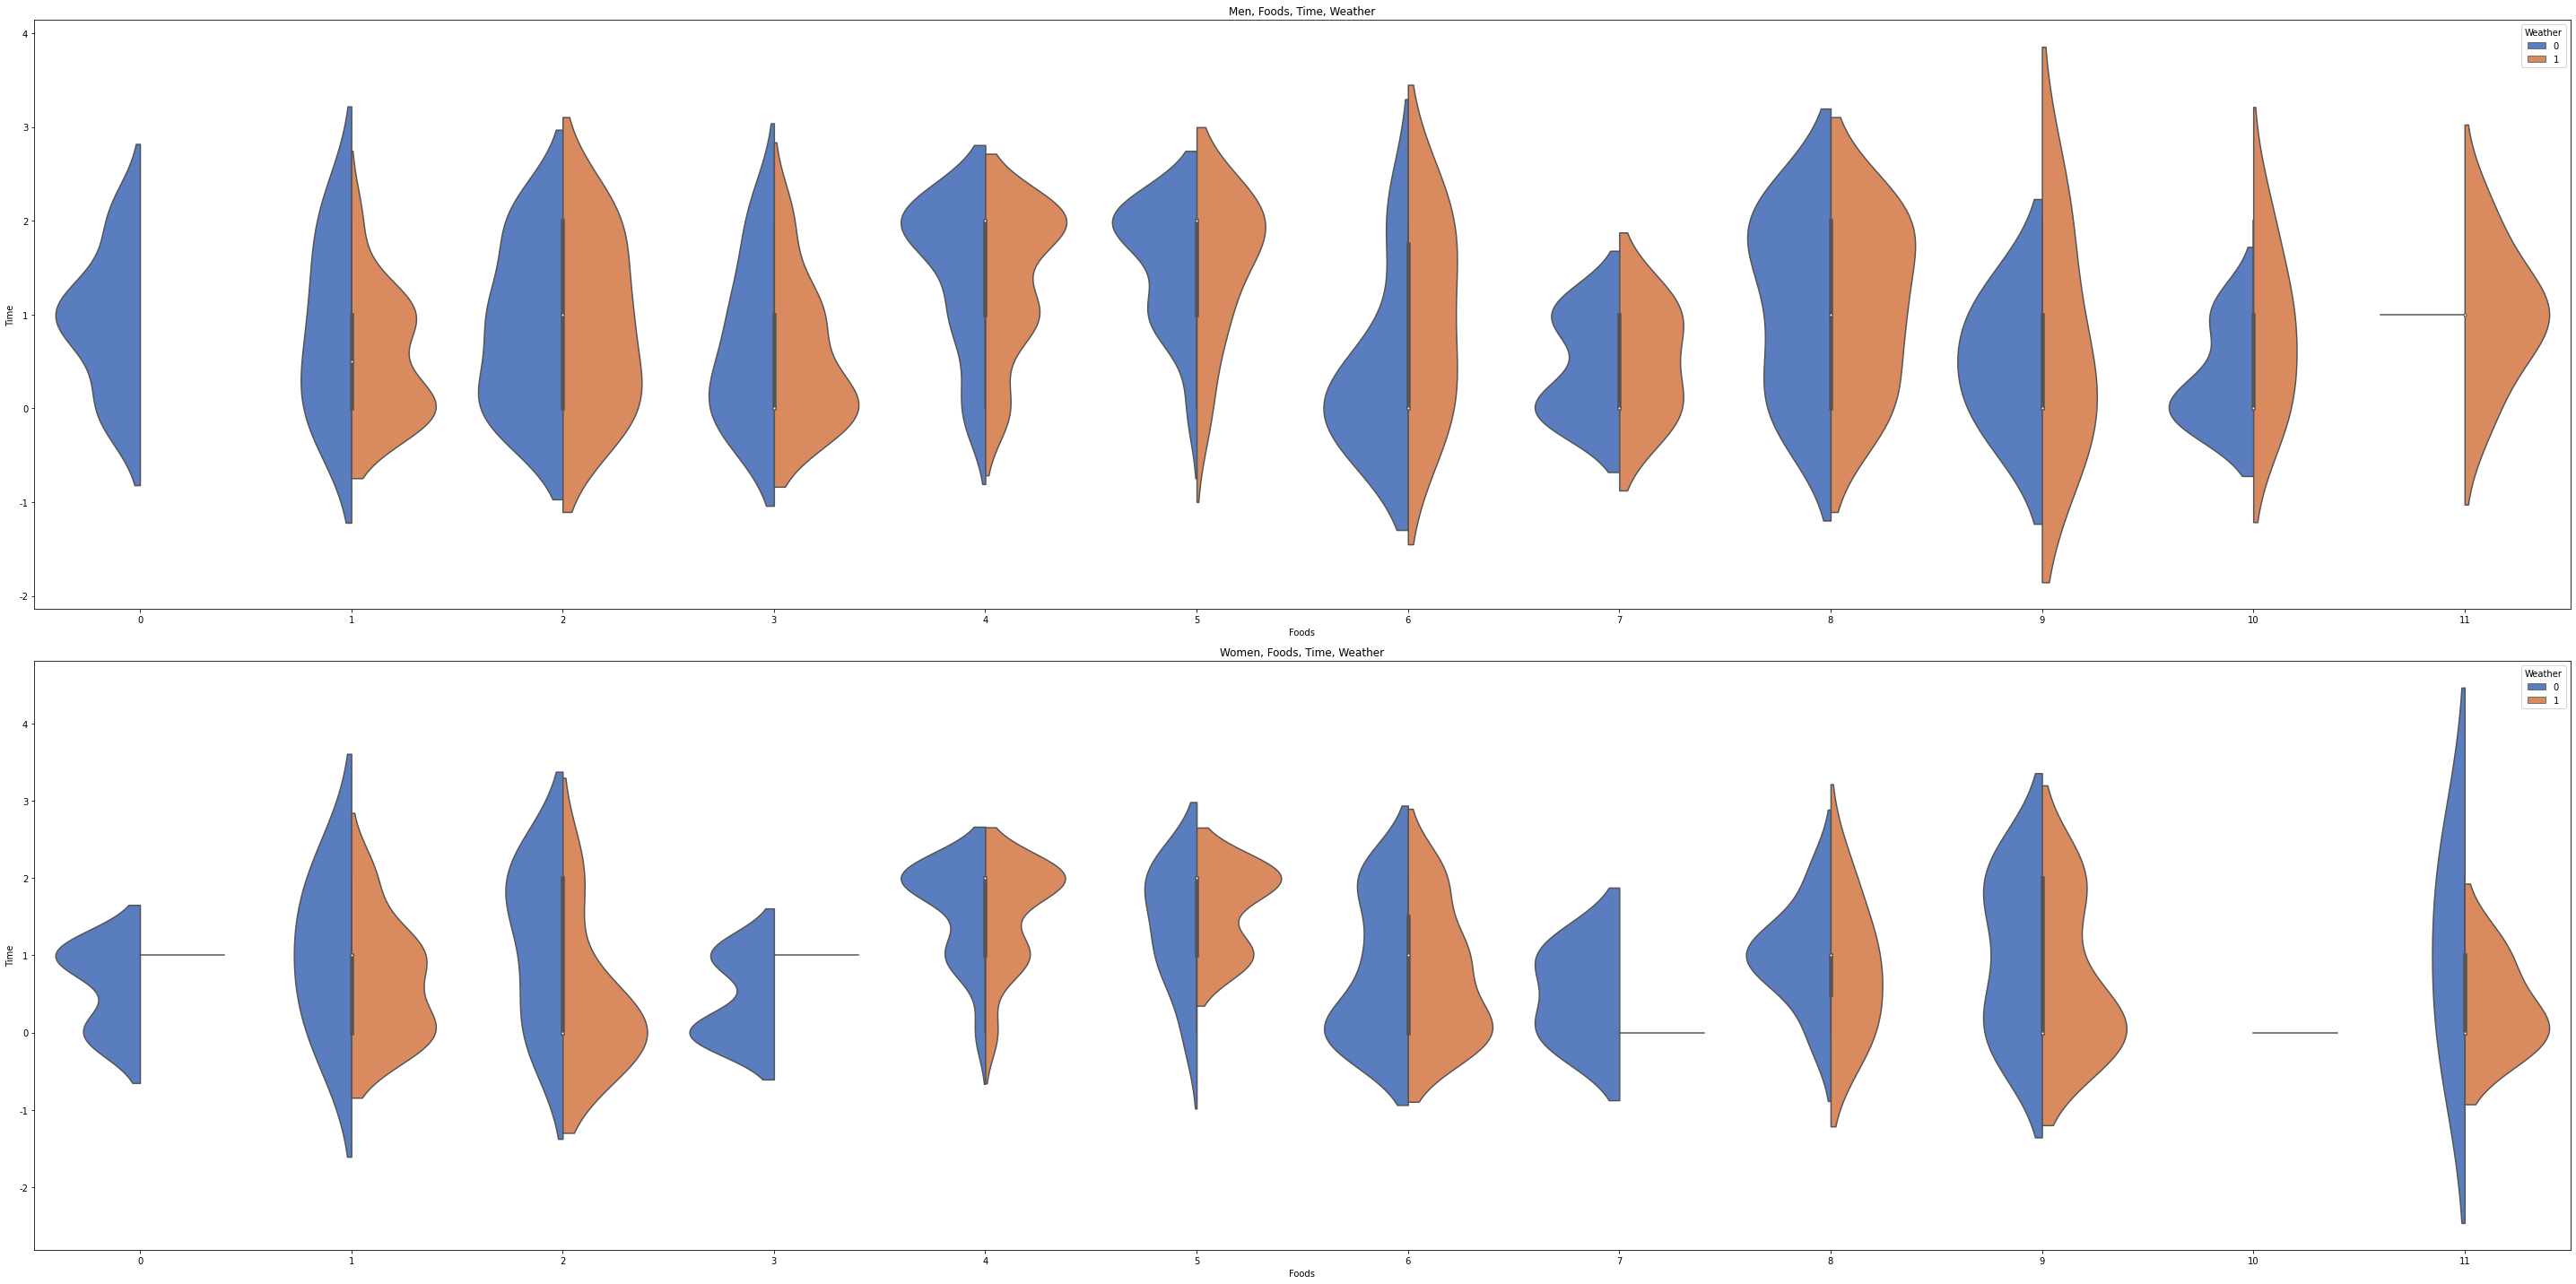

In [ ]:
# 첫번째 그래프 : 남성의 음식, 시간, 날씨 별 그래프
# 두번째 그래프 : 여성의 음식, 시간, 날씨 별 그래프

man = origin_data[origin_data['Gender']==0]
woman = origin_data[origin_data['Gender']==1]

plt.figure(figsize=(40,20))

plt.subplot(211)
plt.title("Men, Foods, Time, Weather")
sns.violinplot(x='Foods', y='Time', hue='Weather', palette="muted", data=man, split=True, jitter=True)

plt.subplot(212)
plt.title("Women, Foods, Time, Weather")
sns.violinplot(x='Foods', y='Time', hue='Weather', palette="muted", data=woman, split=True, jitter=True)

plt.tight_layout()
plt.show()

# dataset split train - test
- train_data, test_data 선별

In [ ]:
from sklearn.model_selection import train_test_split

#Foods column 추출후
data_y = data['Foods'].values

#Foods column 삭제
data = data.drop('Foods', axis=1)
data_x = data[data.columns.tolist()].values # X 데이터에 해당됩니다. X는 총 15개입니다.

In [ ]:
# data_x, data_y 확인용 코드

print(set(data_y))
print(data_x[:5])
print(data_y[:5])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}
[[ 1  7  5  6  2  3  8  1  9 11 12 10  4  0  0]
 [ 1  7  5  6  2  3  8  1  9 11 12 10  4  1  0]
 [ 1  7  5  6  2  3  8  1  9 11 12 10  4  0  1]
 [ 1  7  5  6  2  3  8  1  9 11 12 10  4  1  1]
 [ 1  7  5  6  2  3  8  1  9 11 12 10  4  0  2]]
[0 1 2 3 4]


In [ ]:
(x_train, x_test, y_train, y_test) = train_test_split(data_x, data_y, train_size=0.9, random_state=1)

In [ ]:
# test, train 개수 확인용 코드

print(len(x_train))
print((y_train).shape)
print(len(x_test))
print(len(y_test))

415
(415,)
47
47


- Y 값 one hot encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_test[:5])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


# By Keras 
- optimzer, learning rate 변화 시킬 수 있을 듯
- Keras learning rate API: https://keras.io/api/optimizers/learning_rate_schedules/

- reference : https://wikidocs.net/35476



Keras와 PyTorch 변수 이름 간단 정리
- Keras : x_train, y_train, x_test, y_test   
- PyTorch : x_train_torch, y_train_torch, x_test_torch, y_test_torch

In [ ]:
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

keras_model=Sequential()
keras_model.add(Dense(12, input_dim=15, activation='softmax', kernel_initializer='zero'))
# print(keras_model.get_weights()[0]) # W
# print(keras_model.get_weights()[1]) # b
nb_epochs = 500

# 학습률(learning rate, lr)은 0.1로 합니다.
# opt = keras.optimizers.Adam(learning_rate=0.01)
opt = optimizers.Adam(learning_rate=0.01)

# 케라스에서는 다중클래스분류 문제에서 평가기준/을 ‘accuracy’로 지정했을 경우 내부적으로 categorical_accuracy() 함수를 이용하여 정확도가 계산됩니다.
keras_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# 손실 함수(Loss function)는 크로스 엔트로피 함수를 사용합니다.
history=keras_model.fit(x_train, y_train, batch_size=len(x_train), epochs=nb_epochs, validation_data=(x_test, y_test))
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 nb_epochs번 시도합니다.

Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 2.4849 - accuracy: 0.0675 - val_loss: 2.2873 - val_accuracy: 0.3191
Epoch 2/500
1/1 [==============================] - 0s 38ms/step - loss: 2.3054 - accuracy: 0.2651 - val_loss: 2.2193 - val_accuracy: 0.3191
Epoch 3/500
1/1 [==============================] - 0s 36ms/step - loss: 2.2606 - accuracy: 0.2651 - val_loss: 2.2266 - val_accuracy: 0.3191
Epoch 4/500
1/1 [==============================] - 0s 36ms/step - loss: 2.2608 - accuracy: 0.2651 - val_loss: 2.2199 - val_accuracy: 0.3191
Epoch 5/500
1/1 [==============================] - 0s 42ms/step - loss: 2.2202 - accuracy: 0.2651 - val_loss: 2.2175 - val_accuracy: 0.3191
Epoch 6/500
1/1 [==============================] - 0s 37ms/step - loss: 2.1715 - accuracy: 0.2699 - val_loss: 2.2290 - val_accuracy: 0.3617
Epoch 7/500
1/1 [==============================] - 0s 37ms/step - loss: 2.1377 - accuracy: 0.2916 - val_loss: 2.2373 - val_accuracy: 0.2766
Epoch 8/500
1/1 [=====

# By Keras - plot loss, accuracy & 3D graph

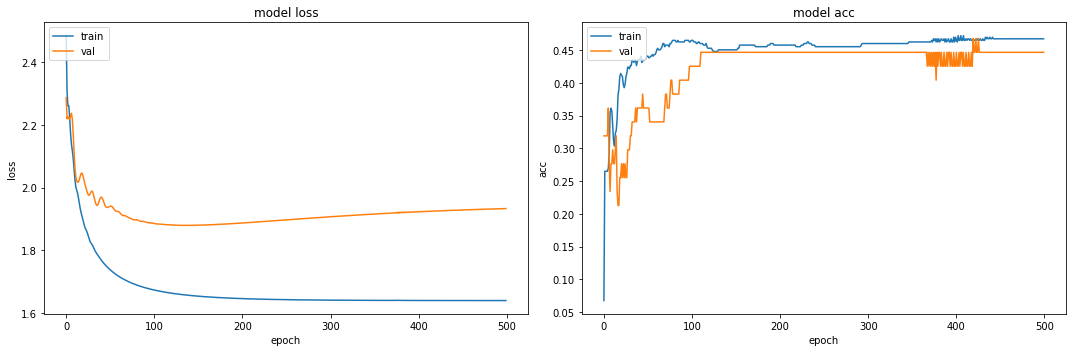

In [ ]:
epochs = range(nb_epochs)
plt.figure(figsize=(15,5))

plt.subplot(121)
make_plt('model loss', history.history['loss'], history.history['val_loss'], 'epoch', 'loss')
plt.subplot(122)
make_plt('model acc', history.history['accuracy'], history.history['val_accuracy'], 'epoch', 'acc')

plt.tight_layout()
plt.show()

In [ ]:
print("\n 테스트 정확도: %.4f" % (keras_model.evaluate(x_test, y_test)[1]))

2/2 [==============================] - 0s 7ms/step - loss: 1.9329 - accuracy: 0.4468

 테스트 정확도: 0.4468


In [ ]:
# test 원래 값과 예측 값 비교를 위한 전처리

# test 원래 값 담는 list, test_lst
test_lst = []
for case in y_test:
  idx = np.where(case == max(case))[0][0]
  test_lst.append(idx)

# test 예측 값 담는 list, pred_lst
pred_y = keras_model.predict(x_test, batch_size=32)
pred_lst = []

# 가장 높은 확률 찾아서 해당 index, 즉 음식 추가
for case in pred_y:
  predict_y = np.where(case == max(case))[0][0]
  pred_lst.append(predict_y)

# 오류 나왔을 경우
if len(pred_lst)!=len(x_test):
  print("test case와 예측 값이 다릅니다.")

In [ ]:
# x, test_lst, pred_lst 확인용 코드

# print(x_test)
print(test_lst)
print(pred_lst)

[7, 8, 4, 10, 4, 3, 1, 2, 10, 5, 3, 1, 3, 1, 5, 4, 6, 4, 4, 2, 4, 4, 2, 2, 11, 1, 7, 3, 2, 4, 5, 2, 3, 2, 4, 4, 4, 2, 10, 4, 4, 4, 8, 5, 6, 6, 4]
[3, 8, 5, 10, 4, 3, 11, 6, 10, 4, 3, 3, 0, 1, 1, 5, 6, 4, 4, 1, 3, 4, 4, 5, 4, 1, 9, 8, 1, 4, 4, 10, 4, 2, 5, 1, 4, 2, 6, 4, 4, 4, 4, 4, 0, 6, 4]


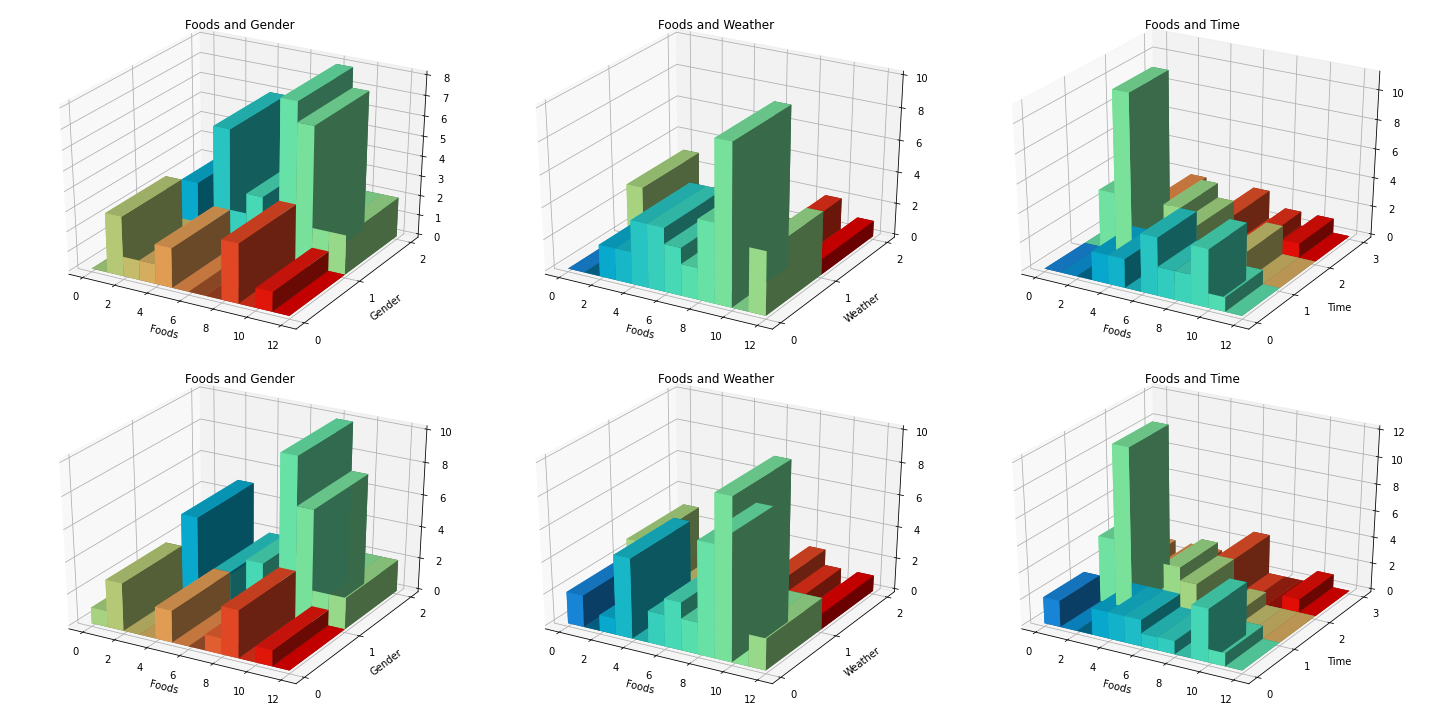

In [ ]:
fig = plt.figure(figsize=(20, 10))

# test 진짜 결과
true_result = [x_test, test_lst]

# Food 와 Gender, Weather, Time
ax1 = fig.add_subplot(231, projection='3d')
menu_3d_data(ax1, 'Foods', 'Gender', true_result)

ax2 = fig.add_subplot(232, projection='3d')
menu_3d_data(ax2, 'Foods', 'Weather', true_result)

ax3 = fig.add_subplot(233, projection='3d')
menu_3d_data(ax3, 'Foods', 'Time', true_result)


# test 예측 결과
predict_result = [x_test, pred_lst]

# Food 와 Gender, Weather, Time
ax1 = fig.add_subplot(234, projection='3d')
menu_3d_data(ax1, 'Foods', 'Gender', predict_result)

ax2 = fig.add_subplot(235, projection='3d')
menu_3d_data(ax2, 'Foods', 'Weather', predict_result)

ax3 = fig.add_subplot(236, projection='3d')
menu_3d_data(ax3, 'Foods', 'Time', predict_result)

plt.tight_layout()
plt.show()

#By PyTorch - initialize - 필수!
 
- 소프트맥스 회귀 구현하기: https://wikidocs.net/60575
- 소프트맥스 회귀로 MNIST 데이터 분류하기: https://wikidocs.net/60324

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
# np.array -> tensor로 변환
x_train_torch= torch.Tensor(x_train)
y_train_torch= torch.Tensor(y_train).long()
x_test_torch= torch.Tensor(x_test)
y_test_torch= torch.Tensor(y_test).long()

In [ ]:
# x_train_torch, y_train_torch 확인용

print(x_train_torch.shape[0])
print(y_train_torch)
print(type(y_train_torch))

415
tensor([[1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0]])
<class 'torch.Tensor'>


In [ ]:
# nb_epochs = 500  # keras 때 설정해서 일단 주석 처리합니다. 

# train의 losses, accuracy
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
num_of_trainset = x_train_torch.shape[0]
num_of_testset = x_test_torch.shape[0]

# By PyTorch - low level


In [ ]:
def getPrediction(feature, W, b):
  return F.softmax(feature.matmul(W) + b, dim=1)

def getAccuracy(size, prediction, result):
    #A0은 예측 index(음식)리스트, A1은 실제 index(음식)리스트
    A0 = torch.argmax(prediction, 1)
    A1 = torch.argmax(result, 1)
    correct_predict = []

    for i in range(size):
      if(A0[i] == A1[i]): #예측과, 실제가 동일하다면(모델이 정답을 맞추면) 음식index append
        correct_predict.append(A0[i].item())
      else:               #예측과, 실제가 다르면(모델이 오답을 낼 떄) -1 append (음식의 index 범위 0~11 이므로)
        correct_predict.append(-1)
    accuracy = (size-correct_predict.count(-1))/size
    return accuracy


In [ ]:
# 모델 초기화
W = torch.zeros((15, 12), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.Adam([W, b], lr=0.01)

In [ ]:
for epoch in range(1, nb_epochs+1):

    # H(x) 계산
    # forward 연산 수행
    # print(model(x_train_torch))
    prediction_train = getPrediction(x_train_torch, W, b)
    prediction_test = getPrediction(x_test_torch, W, b)

    # train, test set에 대한 cost 계산
    # y_train_torch, y_test_torch는 다 원 핫 인코딩 되어있음.
    cost_train = (y_train_torch * -torch.log(prediction_train)).sum(dim=1).mean()
    cost_test = (y_test_torch * -torch.log(prediction_test)).sum(dim=1).mean()

    # train, test set의 cost(loss) 누적
    train_losses.append(cost_train.item())
    test_losses.append(cost_test.item())

    # cost로 H(x) 개선
    # 역전파 단계 전에, optimizer 객체를 사용하여 (모델의 학습 가능한 가중치인) 갱신할
    # 변수들에 대한 모든 변화도(gradient)를 0으로 만듭니다. 이렇게 하는 이유는 기본적으로 
    # .backward()를 호출할 때마다 변화도가 버퍼(buffer)에 (덮어쓰지 않고) 누적되기
    # 때문입니다. - https://tutorials.pytorch.kr/beginner/pytorch_with_examples.html
    optimizer.zero_grad()
    # 오류 역전파
    cost_train.backward()
    # W(가중치) 업데이트
    optimizer.step()
    
    accuracy_train = getAccuracy(num_of_trainset, prediction_train, y_train_torch)
    train_accuracies.append(accuracy_train)                        

    accuracy_test = getAccuracy(num_of_testset, prediction_test, y_test_torch)
    test_accuracies.append(accuracy_test)
  

    # 10번마다 로그 출력
    print('Epoch {:4d}/{} train_Cost: {:.6f} train_Accuracy: {} test_Accuracy: {}'.format(
        epoch, nb_epochs, cost_train.item(), accuracy_train, accuracy_test
    ))
    print()

Epoch    1/500 train_Cost: 2.484907 train_Accuracy: 0.06746987951807229 test_Accuracy: 0.0

Epoch    2/500 train_Cost: 2.304016 train_Accuracy: 0.26506024096385544 test_Accuracy: 0.3191489361702128

Epoch    3/500 train_Cost: 2.258022 train_Accuracy: 0.26506024096385544 test_Accuracy: 0.3191489361702128

Epoch    4/500 train_Cost: 2.258985 train_Accuracy: 0.26506024096385544 test_Accuracy: 0.3191489361702128

Epoch    5/500 train_Cost: 2.219054 train_Accuracy: 0.26506024096385544 test_Accuracy: 0.3191489361702128

Epoch    6/500 train_Cost: 2.170602 train_Accuracy: 0.26987951807228916 test_Accuracy: 0.3191489361702128

Epoch    7/500 train_Cost: 2.136250 train_Accuracy: 0.28674698795180725 test_Accuracy: 0.3617021276595745

Epoch    8/500 train_Cost: 2.115330 train_Accuracy: 0.3566265060240964 test_Accuracy: 0.2765957446808511

Epoch    9/500 train_Cost: 2.090904 train_Accuracy: 0.3614457831325301 test_Accuracy: 0.23404255319148937

Epoch   10/500 train_Cost: 2.057115 train_Accuracy: 0

# By PyTorch - plot loss, accuracy & 3D graph

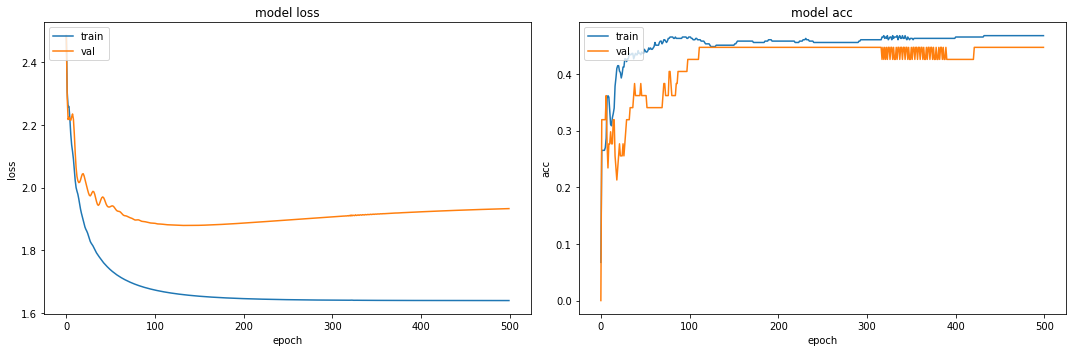

In [ ]:

# epochs = range(nb_epochs) # keras에서 이미 설정해놓아서 주석처리 했습니다.

plt.figure(figsize=(15,5))
plt.subplot(121)
make_plt('model loss', train_losses, test_losses, 'epoch', 'loss')
plt.subplot(122)
make_plt('model acc', train_accuracies, test_accuracies, 'epoch', 'acc')

plt.tight_layout()
plt.show()

In [ ]:
print("\n 테스트 정확도: %.4f" % (test_accuracies[-1]))


 테스트 정확도: 0.4468


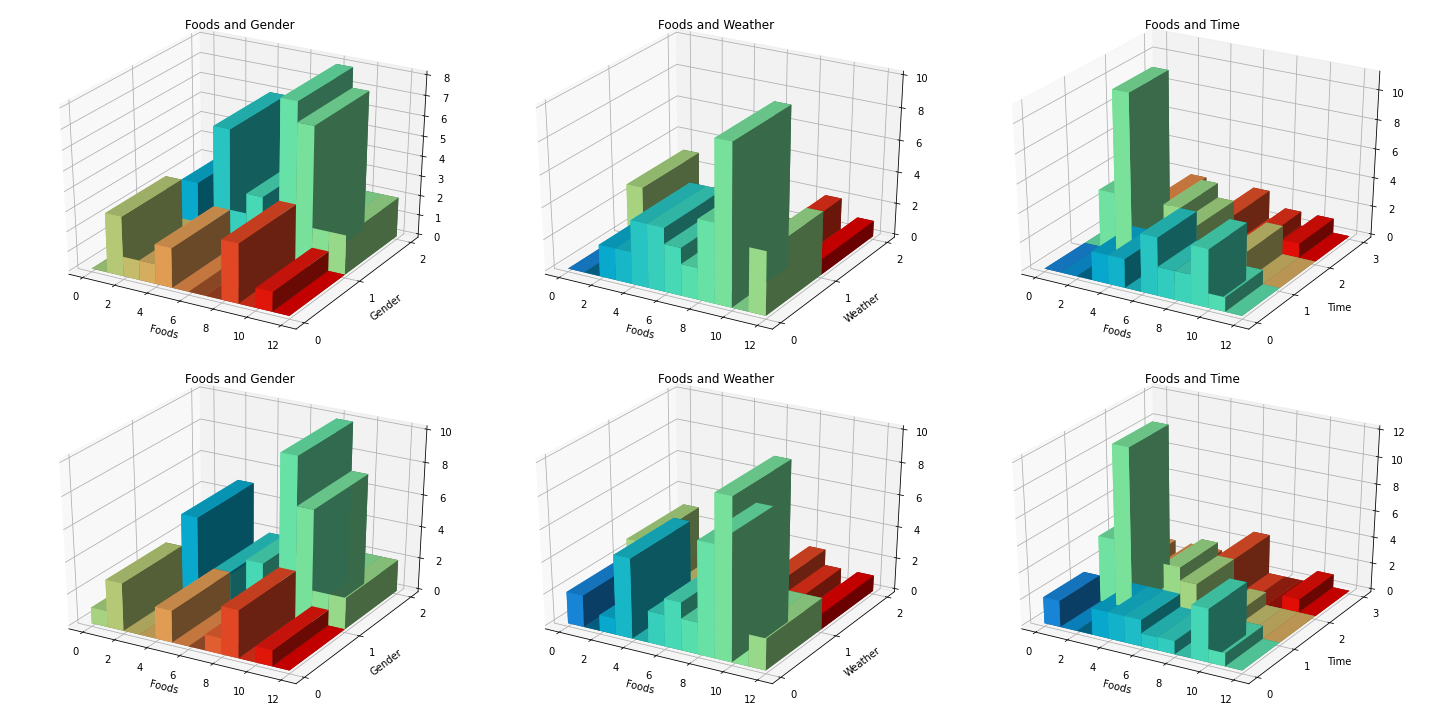

In [ ]:
prediction = getPrediction(x_test_torch, W, b)
result = y_test_torch
pred_lst_torch = torch.argmax(prediction, 1).tolist()
test_lst_torch = torch.argmax(result, 1).tolist()

# plot 코드
fig = plt.figure(figsize=(20, 10))

# test 진짜 결과
true_result = [x_test, test_lst_torch]

# Food 와 Gender, Weather, Time
ax1 = fig.add_subplot(231, projection='3d')
menu_3d_data(ax1, 'Foods', 'Gender', true_result)

ax2 = fig.add_subplot(232, projection='3d')
menu_3d_data(ax2, 'Foods', 'Weather', true_result)

ax3 = fig.add_subplot(233, projection='3d')
menu_3d_data(ax3, 'Foods', 'Time', true_result)


# test 예측 결과
predict_result = [x_test, pred_lst_torch]

# Food 와 Gender, Weather, Time
ax1 = fig.add_subplot(234, projection='3d')
menu_3d_data(ax1, 'Foods', 'Gender', predict_result)

ax2 = fig.add_subplot(235, projection='3d')
menu_3d_data(ax2, 'Foods', 'Weather', predict_result)

ax3 = fig.add_subplot(236, projection='3d')
menu_3d_data(ax3, 'Foods', 'Time', predict_result)

plt.tight_layout()
plt.show()

# By PyTorch - high level
- One hot encoding 하면 안됨!  
- 실행X


In [ ]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        # 데이터의 input형태가 16x1이고, output은 12x1임.
        # 15*12의 형태인 W을 만들어 준다고 생각하자.
        self.linear = nn.Linear(15,12) 

    def forward(self, x):
        return self.linear(x)
        

In [ ]:
model = SoftmaxClassifierModel()
optimizer = optim.Adam(model.parameters(), lr=0.1)

for epoch in range(nb_epochs + 1):

    # H(x) 계산                       
    # forward 연산 수행
    prediction_train = model(x_train_torch)
    prediction_test = model(x_test_torch)
    # train, test set에 대한 cost 계산
    # 여기에 y를 one-hot encoding 하는 것, softmax쓰는 것,
    #  result_y - predict_y 로 오차 구하는 게 한번에 존재
    cost_train = F.cross_entropy(prediction_train, y_train_torch)
    cost_test = F.cross_entropy(prediction_test, y_test_torch)

    # train, test set의 cost(loss) 누적
    train_losses.append(cost_train.item())
    test_losses.append(cost_test.item())

    # cost로 H(x) 개선
    # 역전파 단계 전에, optimizer 객체를 사용하여 (모델의 학습 가능한 가중치인) 갱신할
    # 변수들에 대한 모든 변화도(gradient)를 0으로 만듭니다. 이렇게 하는 이유는 기본적으로 
    # .backward()를 호출할 때마다 변화도가 버퍼(buffer)에 (덮어쓰지 않고) 누적되기
    # 때문입니다. - https://tutorials.pytorch.kr/beginner/pytorch_with_examples.html
    optimizer.zero_grad()
    # 오류 역전파
    cost_train.backward()
    # W(가중치) 업데이트
    optimizer.step()
 
    # train과 test set의 accuracy 계산 및 누적 
    correct_predict_train = torch.argmax(prediction_train, 1) == y_train_torch
    accuracy_train = correct_predict_train.float().mean()
    train_accuracies.append(accuracy_train)

    correct_predict_test = torch.argmax(prediction_test, 1) == y_test_torch
    accuracy_test = correct_predict_test.float().mean()
    test_accuracies.append(accuracy_test)


    # 10번마다 로그 출력
    print('Epoch {:4d}/{} train_Cost: {:.6f} train_'.format(
        epoch, nb_epochs, cost_train.item()
    ))

RuntimeError: ignored

# Set Virtual Datasets

In [ ]:
tmp1 = np.full(12, 12, dtype=np.int32) 
tmp2 = np.arange(12)
squares = np.power(tmp1, tmp2)
print(tmp1)
print(tmp2)
print(squares)

data_x = np.zeros((70*6, 4))
print(data_x.shape)
print(data_x[:5])
#sex, weather, time, pref

for i in range(70):
  sex = np.floor(np.random.rand()*2)
  pref_arr = np.arange(12)
  np.random.shuffle(pref_arr)
  pref =0
  for j in range(12):
    pref += pref_arr[j]*squares[j]
  
  weather = 0 ; time = 0

  for j in range(6):
    idx = 6*i +j
    data_x[idx] = [sex, weather, time, pref]
    # print(weather, time)
    time +=1
    if time>2:
      weather=1; time = 0
print(data_x[:12])

data_y = np.zeros(70*6)
for i in range(len(data_y)):
  data_y[i] = np.random.randint(12)

print(data_y[:30])
print(data_x.shape)
print(data_y.shape)

[12 12 12 12 12 12 12 12 12 12 12 12]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[           1           12          144         1728        20736
       248832      2985984     35831808    429981696   5159780352
  61917364224 743008370688]
(420, 4)
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 4.13872890e+12]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 4.13872890e+12]
 [0.00000000e+00 0.00000000e+00 2.00000000e+00 4.13872890e+12]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 4.13872890e+12]
 [0.00000000e+00 1.00000000e+00 1.00000000e+00 4.13872890e+12]
 [0.00000000e+00 1.00000000e+00 2.00000000e+00 4.13872890e+12]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 8.34587423e+12]
 [1.00000000e+00 0.00000000e+00 1.00000000e+00 8.34587423e+12]
 [1.00000000e+00 0.00000000e+00 2.00000000e+00 8.34587423e+12]
 [1.00000000e+00 1.00000000e+00 0.00000000e+00 8.34587423e+12]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 8.